# Analyzation of the number of timesteps t needed for an equilibrium 
Computes graphs to see the absolute value of the normalized velocity in dependence of the number of timesteps. 
Set the used number of time steps for the simulations respectively

In [4]:
import numpy as np
import VicsekSimulationNumba as vi
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator, AutoLocator)
import pandas as pd
import statsmodels.tsa.stattools as sm
import scipy as sc

In [5]:
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [4]:
N = [40, 500, 1000, 1600]
rho = 4
L = 20
eta = 2

In [7]:
v_a = vi.vaOfT(2000,eta,L,N[0],'DiffN40N')
for i in range(3):
    v_a = np.vstack((v_a, vi.vaOfT(2000,eta,L,N[i+1],'DiffN'+str(N[i+1])+'N')))
    print(i)

0
1
2


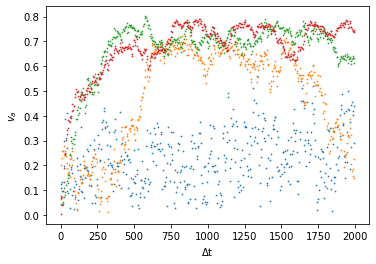

In [8]:
fig = plt.figure()
fig.set_size_inches(w=5.78851, h=4)
ax1 = fig.add_subplot(1,1,1)

#ax1.grid( which="both")

#ax1.xaxis.set_minor_locator(AutoMinorLocator())
#ax1.xaxis.set_major_locator(AutoLocator())
#ax1.yaxis.set_minor_locator(AutoMinorLocator())
#ax1.yaxis.set_major_locator(AutoLocator())

#ax1.tick_params(which='both', width=1)
#ax1.tick_params(which='major', length=7)
#ax1.tick_params(which='minor', length=4, grid_linestyle="--", grid_color="lightgray")

ax1.set_xlabel("$\Delta$t")
ax1.set_ylabel("$v_a$")

for i in range(4):
    plt.scatter(np.arange(0,2000,1)[::4],v_a[i,:2000][::4], s = 0.5, label = '$N$ = '+str(N[i])+' ')
    #plt.hlines(mean[i],0,2000, colors= "red")
#plt.legend(loc = 0)

#plt.savefig('vaOfTEta2DiffN.pgf')

In [16]:
data = pd.read_csv("vaOfTDiffN1600N.csv")
x = np.array(data)[:,1]

In [17]:
acorr = sm.acf(x, nlags = 2000, fft = True)

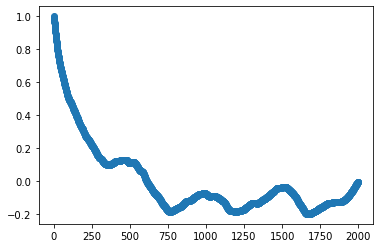

In [18]:
plt.scatter(np.arange(0,2000,1), acorr[:2000])

In [25]:
tau = sc.integrate.simpson(acorr[:1500], np.arange(0,1500,1))

In [26]:
tau

58.888395880660774

In [36]:
acorr

array([ 1.00000000e+00,  8.74220869e-01,  7.44243589e-01, ...,
       -1.94414250e-03, -1.36491626e-03, -7.07060702e-04])